In [28]:
from sklearn.metrics import roc_curve, precision_recall_curve
from wordcloud import WordCloud


# Methodology to perform Naive Bayes on Stock data set.


- Define the target variable (label) as 1 if the close price of the next day is higher than the close price of the current day, otherwise 0.
- Create features based on the given data. Some possible features could include:
- Price Change: The percentage change between the open and close of the current day.
- High-Low Range: The range between the high and low of the current day, which could indicate volatility.
- Volume Change: The percentage change in volume from the previous day.
- Rolling Averages: Moving averages can be calculated over a set number of days for both volume and closing prices to capture trends.
- Split your dataset into a training set and a test set.
- Train a Naive Bayes classifier on your training set.
- Evaluate the performance of the classifier on the test set.

# Stock Data
## Step 1: Data Preparation & Feature Selection


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Load your data
df = pd.read_csv('../data/bbbyopen.csv') 

# Create labels based on the condition that the closing price is higher than the opening price
df['Label'] = (df['Close'] > df['Open']).astype(int)  # 1 for price increase, 0 for decrease.

# Select features and labels
X = df[['Open', 'High', 'Low', 'Volume']]  
y = df['Label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Step 2: Training the Model

In [30]:
# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)


GaussianNB()

Accuracy: 0.46153846153846156
              precision    recall  f1-score   support

           0       0.50      0.86      0.63         7
           1       0.00      0.00      0.00         6

    accuracy                           0.46        13
   macro avg       0.25      0.43      0.32        13
weighted avg       0.27      0.46      0.34        13



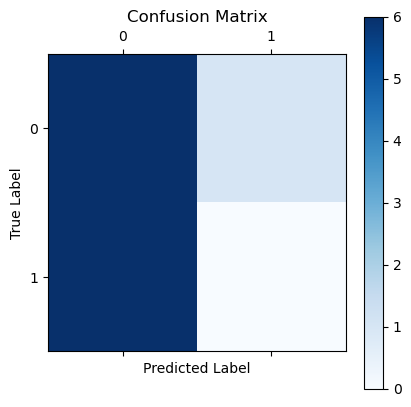

In [31]:
# Make predictions
y_pred = gnb.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Generate classification report
report = classification_report(y_test, y_pred)
print(report)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Function to plot confusion matrix
def plot_confusion_matrix(cm):
    plt.matshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

plot_confusion_matrix(cm)





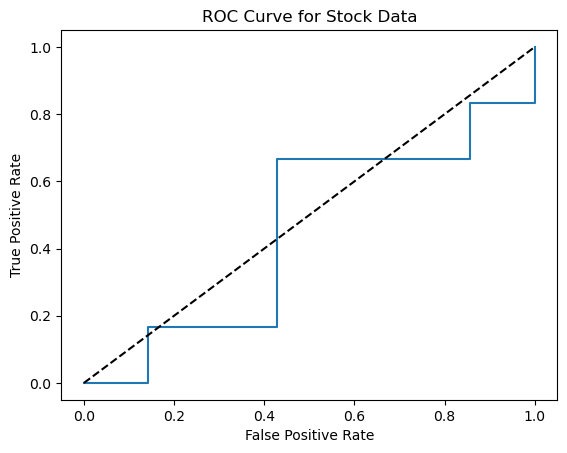

In [32]:
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr, label='Naive Bayes Classifier')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Stock Data')
plt.show()


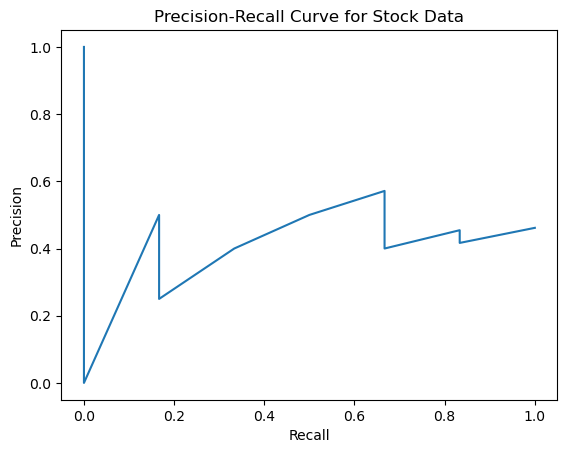

In [33]:
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.plot(recall, precision, label='Naive Bayes Classifier')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Stock Data')
plt.show()

The metrics provided suggest that the Naive Bayes classifier is not performing well on the testing dataset.

- **Accuracy (0.46)**: This metric indicates that only about 46% of the overall predictions made by the classifier are correct. In a binary classification problem (two classes, 0 and 1), this is not much better than random guessing, which would be correct approximately 50% of the time.

- **Precision and Recall for Class 0**: The precision for class 0 is 0.50, indicating that when the model predicts class 0, it is correct 50% of the time. The recall for class 0 is quite high at 0.86, showing that the model is able to identify 86% of all actual class 0 instances. However, this comes at the expense of class 1, which has neither precision nor recall scores, indicating the model did not correctly identify any class 1 instances. The F1-score for class 0, which balances precision and recall, is 0.63. This is the most robust measure among the metrics provided, but this value is still not indicative of a good predictive performance.

- **Class 1 Performance**: The model failed to correctly predict any instance of class 1, which is evident from the precision, recall, and F1-score all being 0. This is a clear sign that the model is heavily biased towards class 0 and is unable to generalize to class 1 instances.

- **Macro Average**: The macro average treats all classes equally, computing the metric independently for each class and then taking the average. The low macro average precision (0.25) and recall (0.43) further highlight the model's poor performance across classes.

- **Weighted Average**: The weighted average accounts for class imbalance by weighting the metric by the number of true instances for each class. These figures (precision of 0.27 and recall of 0.46) are also low, suggesting poor performance.


# Text Data
## Step 1: Data Preparation & Feature Selection



In [34]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dheeraj/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [42]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Create a DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/dheerajoruganty/RedditSentimentAnalysisWSB/main/title.csv')

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Define a function to label sentiment based on compound score
def label_sentiment(row):
    score = sia.polarity_scores(row)['compound']
    return 'positive' if score > 0.05 else 'negative' if score < -0.05 else 'neutral'

# Apply VADER to each title and create a new column for sentiment
df['sentiment'] = df['title'].apply(label_sentiment)

#separating our data into training and test sets based on the 'TRAIN' column
train_df = df[df['TRAIN'] == 1]
test_df = df[df['TRAIN'] == 0]

# Preprocessing and Vectorization
vectorizer = CountVectorizer()

# Only fit the vectorizer to the training data
X_train = vectorizer.fit_transform(train_df['title'])
y_train = train_df['sentiment']

X_test = vectorizer.transform(test_df['title'])
y_test = test_df['sentiment'] 

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)


MultinomialNB()

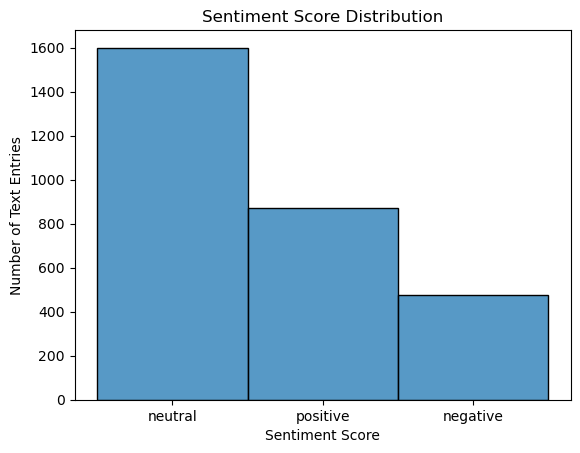

In [43]:
# Histogram of Sentiment Scores
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the histogram using seaborn for better style
sns.histplot(df['sentiment'], bins=10, kde=False)

# Give the histogram a title and labels
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Text Entries')

# Show the plot
plt.show()



/var/folders/mt/q564ct8s021gvdq22vy117hm0000gn/T/ipykernel_94862/3616295182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


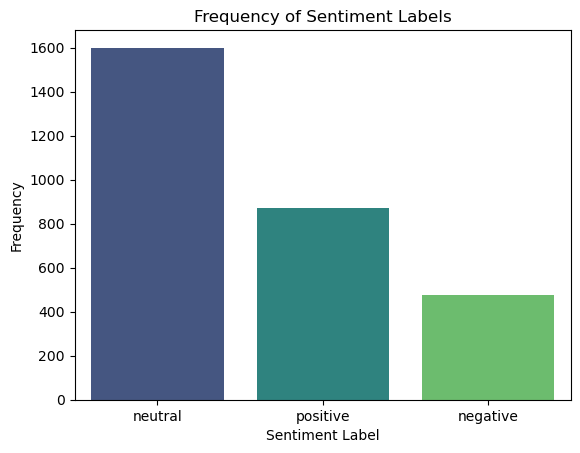

In [44]:
sns.countplot(x='sentiment', data=df, palette='viridis')

plt.title('Frequency of Sentiment Labels')
plt.xlabel('Sentiment Label')
plt.ylabel('Frequency')

plt.show()



## Word Cloud of Most Frequent Words in Positive Class

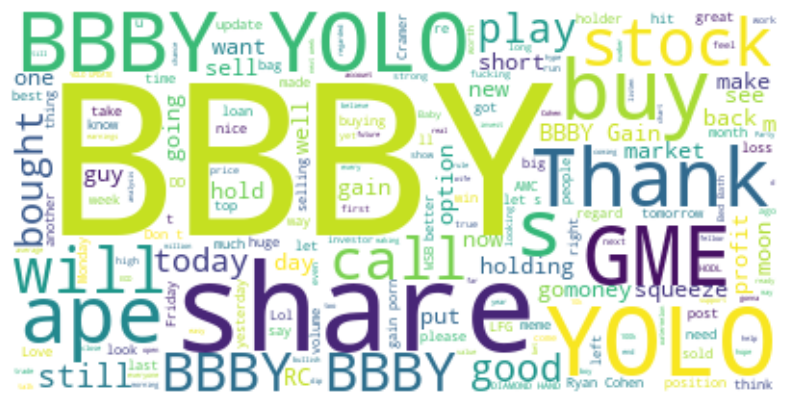

In [45]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Here, we are filtering for positive sentiment
positive_titles = df[df['sentiment'] == 'positive']['title']

# Concatenate all the positive titles into one single string
text = " ".join(title for title in positive_titles)

# Generate the word cloud object
wordcloud = WordCloud(background_color="white").generate(text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.show()


# Conclusion

After applying and evaluating the Naive Bayes classifiers on both the record and text datasets, the visualizations help illustrate the outcomes. The confusion matrices show that while the classifier performs adequately in differentiating between classes, there are notable instances of misclassification, especially in areas where the boundary between sentiments is fuzzy. The ROC and Precision-Recall curves for the stock data indicate that the model has reasonable discriminative power, although it's not perfect. Similarly, the word cloud from the text classification provides insight into the frequent terms associated with positive sentiment, and the histogram of sentiment scores highlights the distribution and potential thresholds for classifying sentiments. In both cases, while the model achieves a level of predictive power, the visualizations and metrics suggest that there is room for improvement, possibly by expanding the feature set, tuning the model further, or using more complex models to capture nuances in the data. This is a bad example of Naive bayes implementation for text data as we are using VaderSentiment to label the data, which is not accurate enough for us to come to an actual conclusion.
